In [11]:
import numpy as np
import seaborn as sns
import torch.nn as nn
import pandas as pd
import torch

cars = pd.read_csv('https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv')
cars.head()

x_list = cars.wt.values
y_list = cars.mpg.values.tolist()

x_np = np.array(x_list, dtype=np.float32).reshape(-1, 1)
y_np = np.array(y_list, dtype=np.float32).reshape(-1, 1)

X = torch.from_numpy(x_np)
Y = torch.from_numpy(y_np)

In [12]:
class LinearRegressionTorch(nn.Module):
    def __init__(self, input_size=1, output_size=1):
        super(LinearRegressionTorch, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
input_dim = 1
output_dim = 1
model = LinearRegressionTorch(input_dim, output_dim)

In [13]:
loss_fun = nn.MSELoss()


In [14]:
LR = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [15]:
losses, slope, bias = [], [], []
NUM_EPOCHS = 1000

for epoch in range(NUM_EPOCHS):
    optimizer.zero_grad()
    
    y_pred = model(X)
    
    loss = loss_fun(y_pred, Y)
    loss.backward()
    
    optimizer.step()
    
    for name, params in model.named_parameters():
        if params.requires_grad:
            if name == 'linear.weight':
                slope.append(params.data.numpy()[0][0])
                
            if name == 'linear.bias':
                bias.append(params.data.numpy()[0])
                
    losses.append(float(loss.data))
    
    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.data: .4f}')

Epoch: 0, Loss:  453.5403
Epoch: 100, Loss:  65.1796
Epoch: 200, Loss:  39.4182
Epoch: 300, Loss:  25.4065
Epoch: 400, Loss:  17.7855
Epoch: 500, Loss:  13.6405
Epoch: 600, Loss:  11.3860
Epoch: 700, Loss:  10.1598
Epoch: 800, Loss:  9.4929
Epoch: 900, Loss:  9.1301


<Axes: >

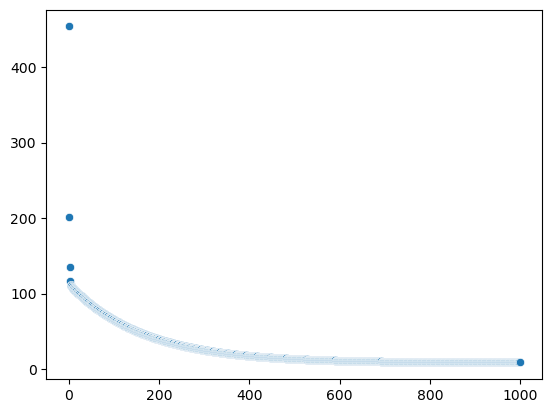

In [16]:
sns.scatterplot(x=range(NUM_EPOCHS), y=losses)

<Axes: >

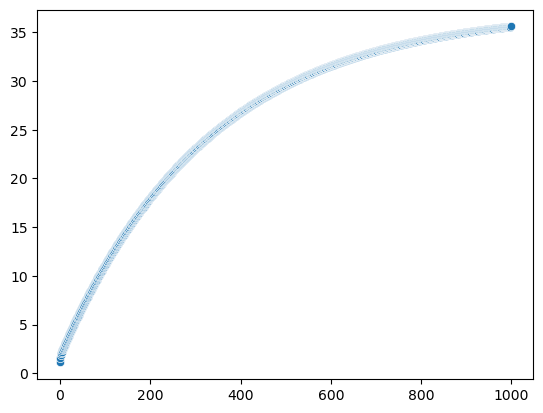

In [17]:
sns.scatterplot(x=range(NUM_EPOCHS), y=bias)

<Axes: >

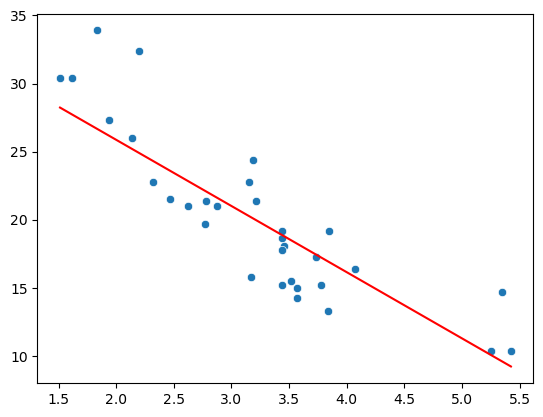

In [18]:
y_pred = model(X).data.numpy().reshape(-1)
sns.scatterplot(x=x_list, y=y_list)
sns.lineplot(x=x_list, y=y_pred, color='red')

In [25]:
from skorch import NeuralNetRegressor
from sklearn.model_selection import GridSearchCV

net = NeuralNetRegressor(
    LinearRegressionTorch,
    max_epochs=10,
    lr=0.1,
    iterator_train__shuffle=True,
)
net.set_params(train_split=False, verbose=0)
params = {
    'lr': [0.02, 0.05, 0.08],
    'max_epochs': [10, 200, 500],
}
gs = GridSearchCV(net, params, refit=False, cv=3, scoring='r2', verbose=2)

gs.fit(X, Y)
print(f"best score: {gs.best_score_:.3f}, best params: {gs.best_params_}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .............................lr=0.02, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.02, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.02, max_epochs=10; total time=   0.0s
[CV] END ............................lr=0.02, max_epochs=200; total time=   0.2s
[CV] END ............................lr=0.02, max_epochs=200; total time=   0.2s
[CV] END ............................lr=0.02, max_epochs=200; total time=   0.2s
[CV] END ............................lr=0.02, max_epochs=500; total time=   0.4s
[CV] END ............................lr=0.02, max_epochs=500; total time=   0.4s
[CV] END ............................lr=0.02, max_epochs=500; total time=   0.4s
[CV] END .............................lr=0.05, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.05, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.05, ma